# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что добавляешь краткое описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

### Откройте файл с данными и изучите общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


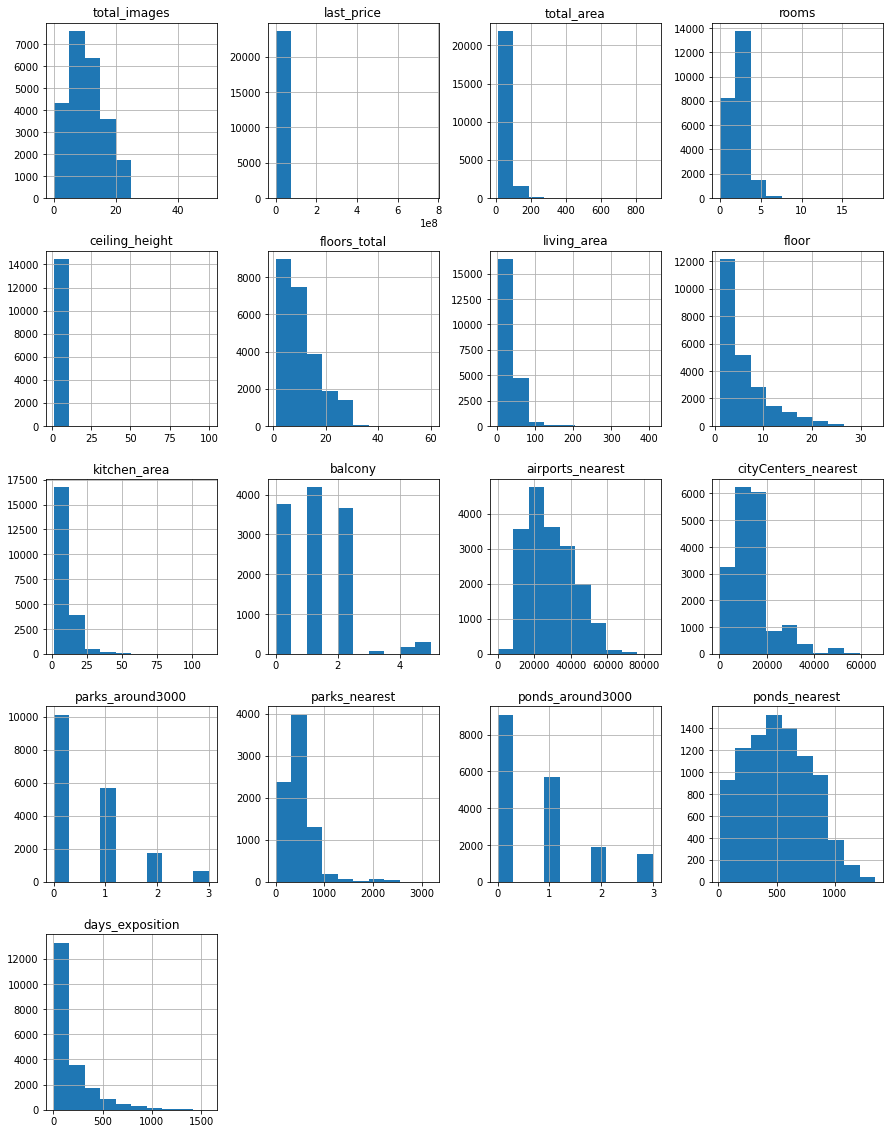

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.hist(figsize=(15, 20))
display(data) #вывожу на экран таблицу
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В этом разделе также важно вывести всю таблицу, чтобы посмотреть как выглядят данные. Используй dispaly
</div>

 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

### Выполните предобработку данных

Заменим тип данных у следующих признаков >>>
- first_day_exposition - так как это дата, то тип данных должен быть преобразован в datetime
- floors_total - не должно быть отрицательных или дробных значений, только целочисленные -> преобразуем в int
- is_apartment - либо ялвяется апартаментами либо нет -> логический тип данных -> bool
- balcony - не должно быть отрицательных или дробных значений, только целочисленные -> преобразуем в int
- parks_around3000, ponds_around3000 - не должно быть отрицательных или дробных значений, только целочисленные -> преобразуем в int

Пропуски есть в следующих признаках >>>
- ceiling_height -  высота потолков (м), скорее всего клиент сам точно не знал высоту потолков.(меняем на среднее или медианное значение)

- living_area - скорее всего жилье является студией и вся квартира это living area(меняем на значения total_area)

- kitchen_area - скорее всего жилье является студией и клиент не стал указывать размеры кухни(нужно подумать как поменять, можно попробывать установить зависимость столбцов друг от друга при помощи корреляции Пирсона и на этой основе сделать выводы на что заменить пропуски)

- locality_name - непонятно почему взялись пропуски, просто заменим строки с пропущенными значениями(пропуски заменяем на 'unknown')

- airports_nearest - сбой в работе алгоритма или ошибка клиента при вводе адреса, а может быть, что объект продажи находится не в городе.(оставим как есть)

- cityCenters_nearest - сбой в работе алгоритма или ошибка клиента при вводе адреса, а может быть, что объект продажи находится не в городе.(оставим как есть)

- days_exposition - если нет данных по длительности обьявления -> его не было или его сразу же сняли.(не меняем пропущенные значения)

- floors_total - скорее всего в доме всего один этаж -> (меняем пропуски на 1)

- is_apartment - большое количество пропущенных значений обусловлено тем, что эти пропуски означают, что жилье не является апартаметами. Продавцы попросту не стали заполнять, так как посчитали очевидным и не нужным, или потому что пропуск будет значить, что жилье не является апартаметами.(все пропуски меняем на 0)

- balcony - если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0.(замена на 0 прущенных значений)

- parks_around3000, ponds_around3000 - пропуски скорее всего, указывают,что на таком расстоянии нет парков или водоемов и значение можно заполнить 0.
- ponds_nearest, parks_nearest  - это автозаполняемые признаки, пропуски значат сбой в работе алгоритма или ошибка клиента при вводе адреса(наши полномочия тут все, звоним в техподдержку выяснять откуда пропуски)пропуски не трогаем, если нужны будут данные для статистики и анализа, то можно взять срез так как количество непропущенных данных это позволяет.



In [2]:
# Сначала разберемся с типом данных и если возможно сразу заменим некторые пропущенные значения
print(data.isnull().sum())

data['balcony'] = data['balcony'].fillna(0).astype(int)

data['floors_total'] = data['floors_total'].fillna(1).astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['parks_around3000'].astype(int)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбце floors_total можно заменить на этаж квартиры либо оставить как есть или либо вообще удалить, так как пропусков меньше 1%
</div>

In [3]:
# Теперь займемся оставшимися пропущенными значениями, тут же сразу будем обрабатывать аномальные значения и дубликаты)
# убираем неявные дубликаты, приводим к нижнему реестру и меняем все ё на е
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
            'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
set(data['locality_name'].unique())
data['locality_name'] = data['locality_name'].fillna('unknown')

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#print(data['ceiling_height'].describe())
#Какой высоты потолки в Питере?
#Пояса подразделяются на подрайоны, указываемые кириллическими символами. 
#Минимальный уровень потолков в жилых комнатах для холодных районов IVA, IA, IБ, IГ, IД составляет от 2,7 м,
#для всех остальных — 2,5 м и более.
#Максимальная высота стен не регламентирована, однако новые дома строятся с показателем не более 3,2 м.
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] <= 2.5, 'ceiling_height'] = 2.5

# проверяем зависимость
print(data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())
# явной зависимости почти нет, меняем на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)

data['living_area'] = data['living_area'].fillna(data['total_area'])

kitchen_area      1.000000
total_area        0.609121
last_price        0.519869
living_area       0.428674
ceiling_height    0.299549
Name: kitchen_area, dtype: float64


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Дубликаты удалены верно, но лучше постараться автоматизировать этот процесс)
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для столбцов living_area / kithen_area можно найти соотношение средней жилой / кухонной площади к средней общей площади и использовать полученное значение для замены пропусков
</div>

### Добавьте в таблицу новые столбцы

In [4]:
# По порядку идет добавление в таблицу новых столбцов
# 1
data['price_of_one_square_meter'] = (data['last_price']/data['total_area']).round(2)
# 2
data['day_of_publication'] = data['first_day_exposition'].dt.weekday 
# 3
data['month_of_publication'] = data['first_day_exposition'].dt.month
# 4
data['year_of_publication'] = data['first_day_exposition'].dt.year 
# 5
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(floor, axis=1) 
# 6
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


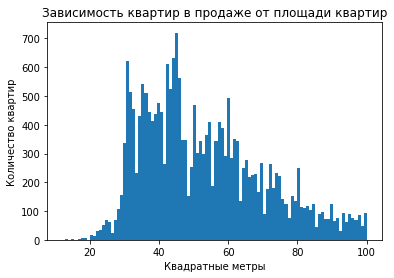

In [5]:
# общая площадь
print(data['total_area'].describe())
import matplotlib.pyplot as plt
plt.hist(data['total_area'], bins=100, range=(12,100))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

count    23699.000000
mean        36.775430
std         25.902159
min          2.000000
25%         19.000000
50%         31.000000
75%         44.000000
max        631.000000
Name: living_area, dtype: float64


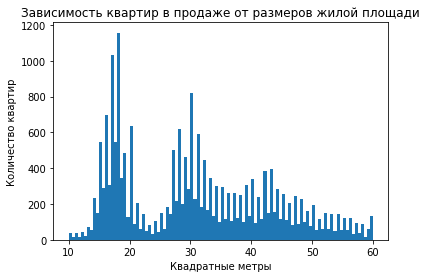

In [6]:
# жилая площадь
print(data['living_area'].describe())
import matplotlib.pyplot as plt
plt.hist(data['living_area'], bins=100, range=(10,60))
plt.title('Зависимость квартир в продаже от размеров жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64


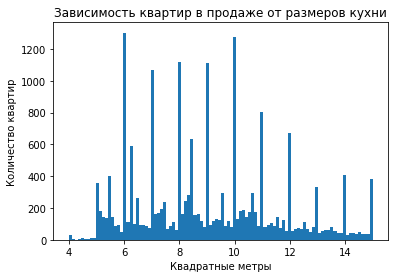

In [7]:
# площадь кухни
print(data['kitchen_area'].describe())
import matplotlib.pyplot as plt
plt.hist(data['kitchen_area'], bins=100, range=(4,15))
plt.title('Зависимость квартир в продаже от размеров кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


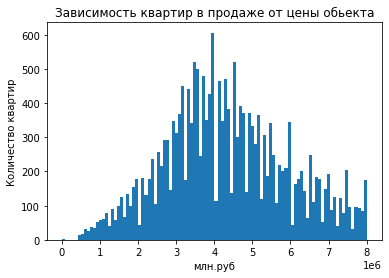

In [8]:
# цена объекта
print(data['last_price'].describe())
data['last_price'].round(2)
import matplotlib.pyplot as plt
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,8.00000e+06))
plt.title('Зависимость квартир в продаже от цены обьекта')
plt.xlabel('млн.руб')
plt.ylabel('Количество квартир')
plt.show()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


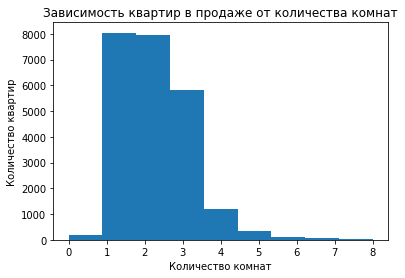

In [9]:
# количество комнат
print(data['rooms'].describe())
import matplotlib.pyplot as plt
plt.hist(data['rooms'], bins=9, range=(0,8))
plt.title('Зависимость квартир в продаже от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

count    23699.000000
mean         2.699345
std          0.252032
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


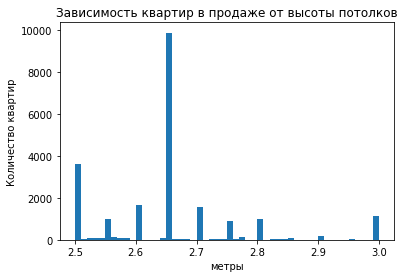

In [10]:
# высота потолков
print(data['ceiling_height'].describe())
import matplotlib.pyplot as plt
plt.hist(data['ceiling_height'], bins=50, range=(2.5,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.show()

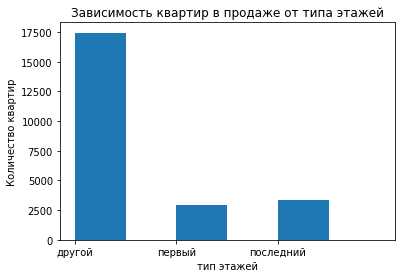

In [11]:
# тип этажа квартиры
# print(data['type_floor'].describe())

# код который был
# import matplotlib.pyplot as plt
# (
#     data.pivot_table(index='type_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
#     .plot(grid=True, style='x-', figsize=(4, 4), title='Зависимость цены от этажа расположения квартиры')
# )
# plt.xlabel('Расположение квартиры по этажам ')
# plt.ylabel('Цена')
# plt.show()

# исправленный код
import matplotlib.pyplot as plt
plt.hist(data['type_floor'], bins=6, range=(0, 3))
plt.title('Зависимость квартир в продаже от типа этажей')
plt.xlabel('тип этажей')
plt.ylabel('Количество квартир')
plt.show()


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут нужен график, который бы показал количество квартир каждой категории этажей
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

count    23699.000000
mean        10.638719
std          6.610834
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


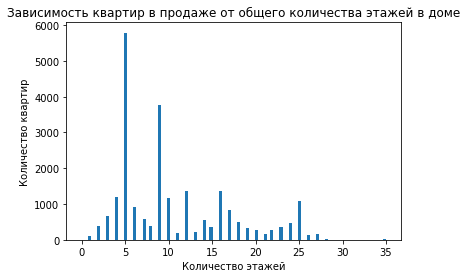

In [12]:
# общее количество этажей в доме
print(data['floors_total'].describe())
import matplotlib.pyplot as plt
plt.hist(data['floors_total'], bins=100, range=(0,35))
plt.title('Зависимость квартир в продаже от общего количества этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


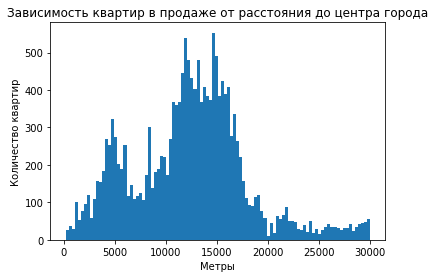

In [13]:
# расстояние до центра города в метрах
print(data['city_centers_nearest'].describe())
import matplotlib.pyplot as plt
plt.hist(data['city_centers_nearest'], bins=100, range=(181,30000))
plt.title('Зависимость квартир в продаже от расстояния до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


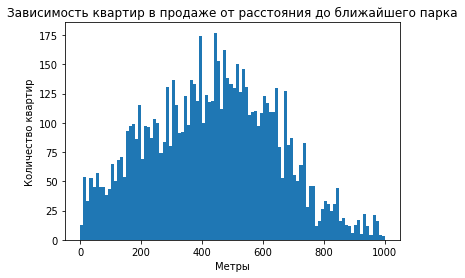

In [14]:
# расстояние до ближайшего парка
print(data['parks_nearest'].describe())
import matplotlib.pyplot as plt
plt.hist(data['parks_nearest'], bins=100, range=(1,1000))
plt.title('Зависимость квартир в продаже от расстояния до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

### Промежуточный вывод к первому пункту

Исследовалось количество квартир в зависимости от разных признаков:
- общая площадь - на продажу больше всего выставляются квартир с общей площадью от 40 до 69 кв. метров с максимумом около 52 кв. метров.

- жилая площадь - квартиры с жилой площадью примерно 18 кв.м и 32 кв.м, притом что в интервале от 20 до 27 замечено проседание и в этом диапазоне меньше всего квартир выставлено на продажу 
- площадь кухни - больше всего квартир выставлено на продажу с площадью кухни 10, 6 или 8 кв.м
- цена объекта - наиболее выставляют жилье с ценой, которая плавает около значения 3,9 млн руб += 0,1 млн
- количество комнат - чаще всего на продажу выставляются однушки
- высота потолков - чаще всего на продажу выставляются квартиры с потолками примерно 2,65м
- тип этажа квартиры («первый», «последний», «другой») - самой чаще продаваемой категорией стали квартиры с типом этажа "другой", а самой немногочисленной становиться "первый" этаж.
- общее количество этажей в доме - больше всего квартир выставляются на продажу в 5 этажных домах
- расстояние до центра города в метрах - по гистограмме видно что выставленные на продажу квартиры чаще всего расположены на расстоянии 1200-1500 от центра
- расстояние до ближайшего парка - можно сказать что у большего количества  жилья на продаже расстояние до парка примерно 420 или 400 м

То есть можно изобразить  среднестатистический портрет продаваемого жилья, квартира однокомнатная, находящаяся не на первом и не на последнем этажах, размером примерно 18 или 32 квадрата, с площадью кухни 6 квадратов, стоимостью 3.9млн рублей и потолками 2,65 метров в пятиэтажном доме расположенном в спальных райноах на росстоянии 1200-1500 м от центра города.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


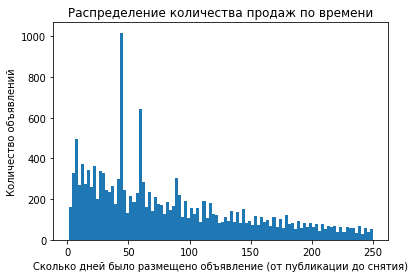

In [15]:
# Изучим, как быстро продавались квартиры
print(data['days_exposition'].describe())
plt.hist(data['days_exposition'], bins=100, range=(1,250))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

### Промежуточный вывод ко второму пункту

Итак, в результате исследования были получены медианное(95) и среднее значения(180.8). При нахождении времени за которое обычно продаются квартиры стоит учитывать, что 
среднее сильно реагирует на выбросы, тем самым искажая наши данные, в отличие от медианы, поэтому медианное значение более точно характеризует время за которое обычно продается жилье, - 95 суток.
быстрыми у нас будут считаться продажи сделанные за 45 или менее дней, а аномально долгими продажами будут являться начиная с 232 дней.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>А как бы ты объяснила эти пики в районе 45 и 60 дней?
</div>

In [16]:
# Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area',
                                            'kitchen_area','rooms','day_of_publication',
                                            'month_of_publication','year_of_publication']).corr(),'\n')

Корреляция: 

                      day_of_publication  kitchen_area  last_price  \
day_of_publication              1.000000      0.551975    0.323738   
kitchen_area                    0.551975      1.000000    0.284824   
last_price                      0.323738      0.284824    1.000000   
living_area                    -0.041592      0.044782    0.615842   
month_of_publication            0.269221     -0.009482   -0.019113   
rooms                          -0.059111      0.177180    0.442449   
total_area                      0.320962      0.454583    0.738972   
year_of_publication             0.181063     -0.254011   -0.052080   

                      living_area  month_of_publication     rooms  total_area  \
day_of_publication      -0.041592              0.269221 -0.059111    0.320962   
kitchen_area             0.044782             -0.009482  0.177180    0.454583   
last_price               0.615842             -0.019113  0.442449    0.738972   
living_area              1.0000

In [17]:
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.284824     0.044782  0.177180    0.454583
last_price        0.284824    1.000000     0.615842  0.442449    0.738972
living_area       0.044782    0.615842     1.000000  0.882177    0.876137
rooms             0.177180    0.442449     0.882177  1.000000    0.811538
total_area        0.454583    0.738972     0.876137  0.811538    1.000000 



прямой зависимости нет, нужно обработать данные

In [18]:
def quartile(df, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dfq

list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height' ]
for col in list_features:
    data[col] = quartile(data, col)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

In [19]:
print('Корреляция:','\n')
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n')

Корреляция: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.507438    -0.207443 -0.132606    0.342559
last_price        0.507438    1.000000     0.678485  0.551637    0.905255
living_area      -0.207443    0.678485     1.000000  0.897720    0.887079
rooms            -0.132606    0.551637     0.897720  1.000000    0.786100
total_area        0.342559    0.905255     0.887079  0.786100    1.000000 



Стали видны зависимости между >>> 
- ценой и общей площадью
- ценой и количеством комнат
остальные зависимости либо слабые, либо прямой зависимости нет

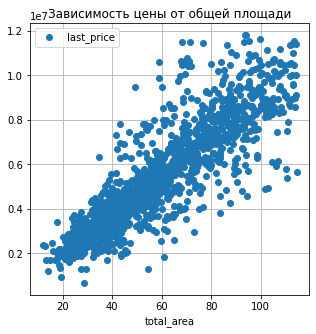

In [20]:
# построим графики 
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()


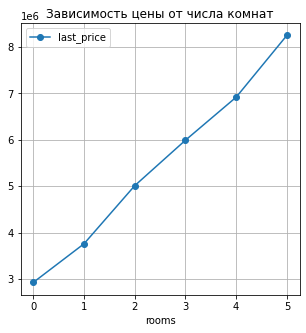

In [21]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

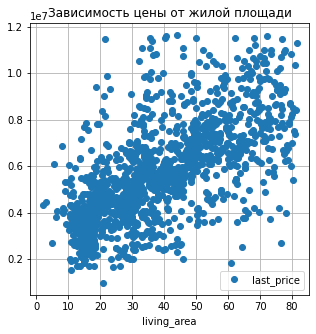

In [22]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

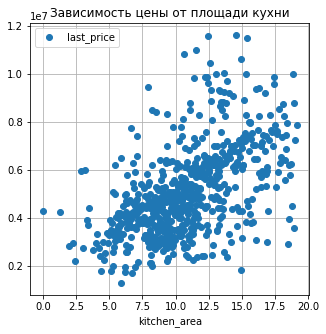

In [23]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

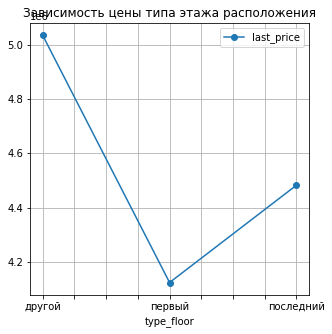

In [24]:
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

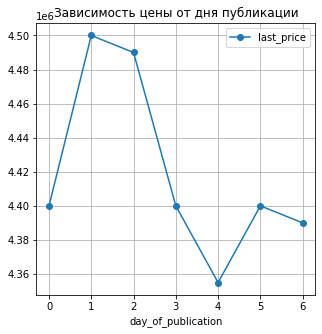

In [25]:
(
    data.pivot_table(index='day_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

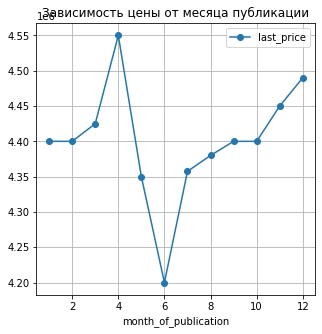

In [26]:
(
    data.pivot_table(index='month_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

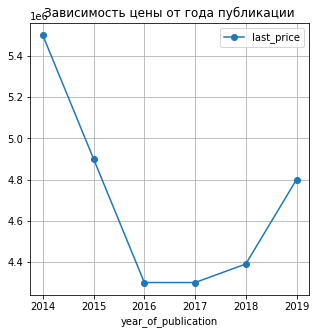

In [27]:
(
    data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

### Промежуточный вывод к третьему пункту

Исходя из постренных графиков, можно сделать вывод: 
- С ростом общей площади, растет стоимость. У этих параметров наблюдается высокая Корреляция.

- Очевидно что число комнат влияет на стоимость чем больше комнат следует больше жилая площадь и соответственно больше цена.
- Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

In [28]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

price = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price.columns = ['count']
price = price.sort_values(by='count', ascending=False).head(10)
price['price_of_one_square_meter'] = data.pivot_table(index='locality_name', values='price_of_one_square_meter').round(2)
price.sort_values(by='price_of_one_square_meter', ascending=False)


,count,price_of_one_square_meter
locality_name,,
санкт-петербург,13737,114849.01
пушкин,338,103125.82
кудрово,470,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,336,75424.58
гатчина,305,68746.15
всеволожск,397,68654.47


### Промежуточный вывод к четвертому пункту

Пунктом с самой высокой стоимостью квадратного метра оказался санкт-петербург с 114849.01 за кв.м(еще пушкин с 103125.82 кв.м), а с самой низкой стоимостью - выборг, 58141.91 за кв.м.(еще гатчина 68746.15 кв.м и всеволжск 68654.47 кв.м)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

In [29]:
# Выделим квартиры в Санкт-Петербурге с помощью столбца 
# `locality_name` и вычислите их среднюю стоимость на разном удалении от центра

data.query('locality_name == "санкт-петербург"')['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

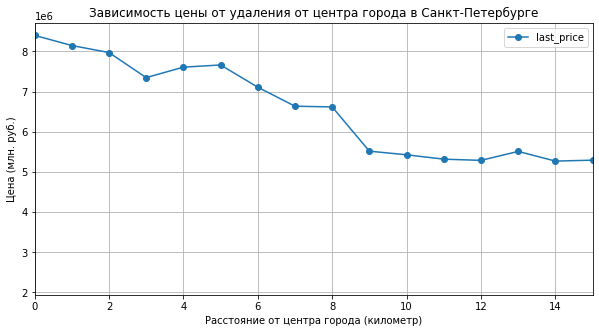

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
city_centers_nearest_km,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.346575e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.108234e+06
7.0,6.635321e+06
8.0,6.617244e+06


In [30]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and city_centers_nearest_km<10').pivot_table(values='last_price', index='city_centers_nearest_km')

### Промежуточный вывод к пятому пункту

Из полученных данных видно, что очевидно самая большая стоимость у квартир расположенных в центре, их стоимость уменьшается c ростом расстояния от центра города и далее постепенно стоимость становиться независитмой от удаления.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

### Напишите общий вывод

Что было сделано в процессе работы с даннми таблицы 'Объявления о продаже квартир':
1) Была получена информация в виде таблице с 22 столбцами и 23699 строками, были просмотрены данные и на их основе по всем численным значениям построили гистограммы, по которым было определено наличие аномальных значений. 
2) На данном этапе проводилось предобработка данных в ходе которых были выявлены и устранены дубликаты, данные были преобразованы в нужные типы данных(каждое преобразование обосновывалось), ну а самое главное были удалены многочисленные пропуски(также все замены были обоснованы), без чего конечно дальнейший анализ был бы бессмысленным.
3) Этим промежуточным этапом были добавлены новые столбцы в нашу таблицу, для последующего использования при анализе и составлении статитстики.
4) Данный этап является основным, так как именно в нем мы делали наш исследовательский анализ.
***первым шагом*** было изучение параметров(общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка) объектов и построение отдельных гистограмм для каждого из этих параметров. В следствии чего был получен портрет среднестатистической квартиры на продажу( квартира однокомнатная, находящаяся не на первом и не на последнем этажах, размером примерно 18 или 32 квадрата, с площадью кухни 6 квадратов, стоимостью 3.9млн рублей и потолками 2,65 метров в пятиэтажном доме расположенном в спальных райноах на росстоянии 1200-1500 м от центра города.)
***вторым шагом*** мы определили что обычно жилье продается 95 суток, быстрыми будут считаться продажи сделанные за 45 или менее дней, а аномально долгими продажами будут являться начиная с 232 дней.
***третий шаг***  - Определили от чего сильнее зависит цена на жилье. Цена зависит от общей площади(с ростом параметра увеличивается), числа комнат(с ростом параметра увеличивается) и от типа нахождения этажа(первый последний или другой).
***четвертый шаг*** удалось получить среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Пунктом с самой высокой стоимостью квадратного метра оказался Санкт-петербург с 114849.01 за кв.м, а с самой низкой стоимостью - Выборг, 58141.91 за кв.м.
***пятый шаг*** Получили информацию о том, что самая большая стоимость у квартир расположенных в центре, их стоимость уменьшается c ростом расстояния от центра города и далее постепенно стоимость становиться независитмой от удаления.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- вывести всю таблицу	
<br>- построить график для категории этажей

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.